In [1]:
data = read.csv("./data/sales-of-shampoo-over-a-three-year.csv")

In [2]:
head(data)

,Month,Sales.of.shampoo.over.a.three.year.period
,<chr>,<dbl>
1,"Friday, January 1, 2016",266.0
2,"Monday, February 1, 2016",145.9
3,"Tuesday, March 1, 2016",183.1
4,"Friday, April 1, 2016",119.3
5,"Sunday, May 1, 2016",180.3
6,"Wednesday, June 1, 2016",168.5


In [3]:
nrow(data)

[1] 36

In [4]:
ncol(data)

[1] 2

In [5]:
str(data)

'data.frame':	36 obs. of  2 variables:
 $ Month                                    : chr  "Friday, January 1, 2016" "Monday, February 1, 2016" "Tuesday, March 1, 2016" "Friday, April 1, 2016" ...
 $ Sales.of.shampoo.over.a.three.year.period: num  266 146 183 119 180 ...


In [6]:
data_ts = ts(data$Sales.of.shampoo.over.a.three.year.period,
             start = c(2016, 1), frequency = 12)

In [7]:
data_ts

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2016,266.0,145.9,183.1,119.3,180.3,168.5,231.8,224.5,192.8,122.9,336.5,185.9
2017,194.3,149.5,210.1,273.3,191.4,287.0,226.0,303.6,289.9,421.6,264.5,342.3
2018,339.7,440.4,315.9,439.3,401.3,437.4,575.5,407.6,682.0,475.3,581.3,646.9


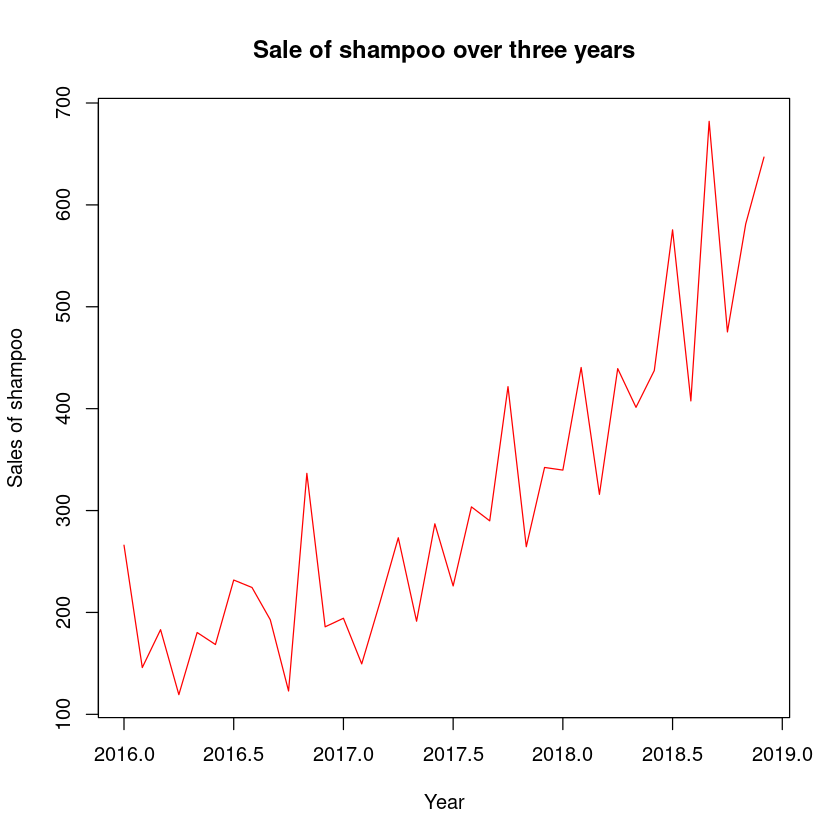

In [8]:
plot(data_ts, main = "Sale of shampoo over three years",
     col = 'red', xlab = 'Year', ylab = 'Sales of shampoo')

In [9]:
comp = decompose(data_ts)
comp$x

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2016,266.0,145.9,183.1,119.3,180.3,168.5,231.8,224.5,192.8,122.9,336.5,185.9
2017,194.3,149.5,210.1,273.3,191.4,287.0,226.0,303.6,289.9,421.6,264.5,342.3
2018,339.7,440.4,315.9,439.3,401.3,437.4,575.5,407.6,682.0,475.3,581.3,646.9


In [10]:
comp$seasonal

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2016,-19.193924,-2.218924,-48.175174,27.591493,-44.800174,6.345660,2.951910,30.431076,-1.171007,20.295660,37.274826,-9.331424
2017,-19.193924,-2.218924,-48.175174,27.591493,-44.800174,6.345660,2.951910,30.431076,-1.171007,20.295660,37.274826,-9.331424
2018,-19.193924,-2.218924,-48.175174,27.591493,-44.800174,6.345660,2.951910,30.431076,-1.171007,20.295660,37.274826,-9.331424


> **Nhận xét**
> * Xét về yếu tố theo mùa, thì doanh số bàn hàng có xu hướng tăng vào tháng 4, 6, 7, 8, 10 và 11. Còn lại giảm.

In [11]:
comp$trend

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2016,NA,NA,NA,NA,NA,NA,193.4708,190.6333,191.9083,199.4500,206.3292,211.7292
2017,216.4250,219.4792,226.8208,243.3125,252.7583,256.2750,268.8500,287.0292,303.5583,314.8833,330.5458,345.5583
2018,366.3875,385.2833,405.9542,424.5292,439.9667,465.8583,NA,NA,NA,NA,NA,NA


> **Nhận xét**
> * Doanh số bán hàng có xu hướng tăng kể từ tháng 8 năm 2016.

In [12]:
comp$random

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2016,NA,NA,NA,NA,NA,NA,35.377257,3.435590,2.062674,-96.845660,92.896007,-16.497743
2017,-2.931076,-67.760243,31.454340,2.396007,-16.558160,24.379340,-45.801910,-13.860243,-12.487326,86.421007,-103.320660,6.073090
2018,-7.493576,57.335590,-41.878993,-12.820660,6.133507,-34.803993,NA,NA,NA,NA,NA,NA


> **Nhận xét**
> * Doanh số bán hàng cứ tăng rồi giảm, ko đồng đều, xem ra ko có yếu tố theo chu kì.

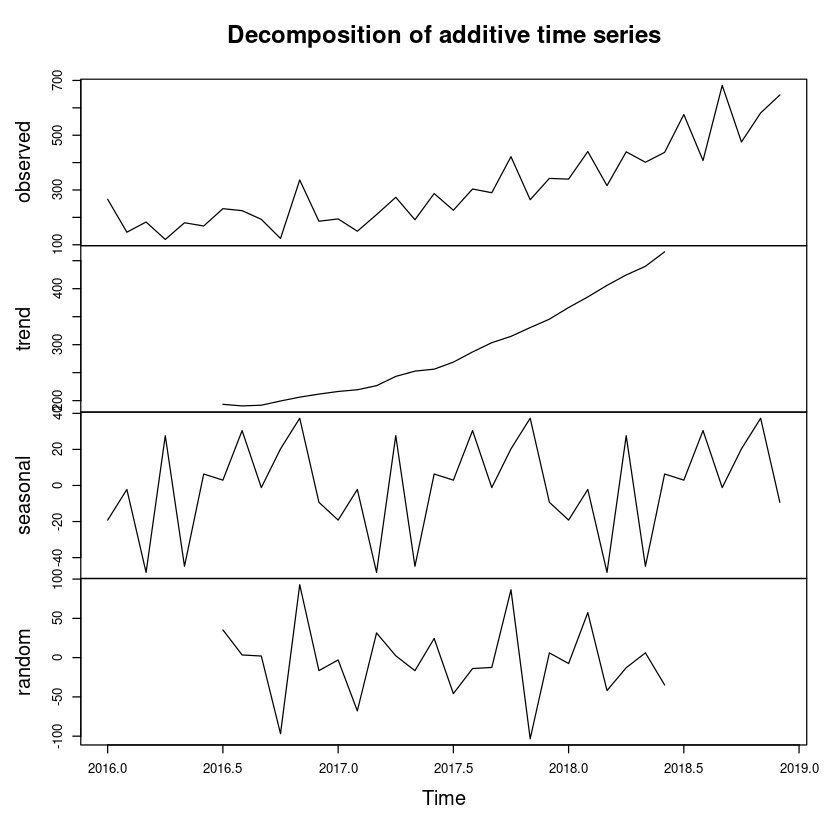

In [13]:
plot(comp)

In [14]:
data_forecast = HoltWinters(data_ts, seasonal = 'multiplicative')

In [15]:
data_forecast

Holt-Winters exponential smoothing with trend and multiplicative seasonal component.

Call:
HoltWinters(x = data_ts, seasonal = "multiplicative")

Smoothing parameters:
 alpha: 0.01545636
 beta : 1
 gamma: 0.5325687

Coefficients:
           [,1]
a   540.0389256
b    21.4971642
s1    1.0362748
s2    1.0461213
s3    0.9415548
s4    1.2015176
s5    0.9289058
s6    1.1248427
s7    1.2059903
s8    1.0455186
s9    1.2663928
s10   1.0340566
s11   1.1864896
s12   1.1159096

In [16]:
data_forecast$SSE

[1] 260746.8

In [17]:
data_forecast$SSE / length(data_ts)

[1] 7242.967

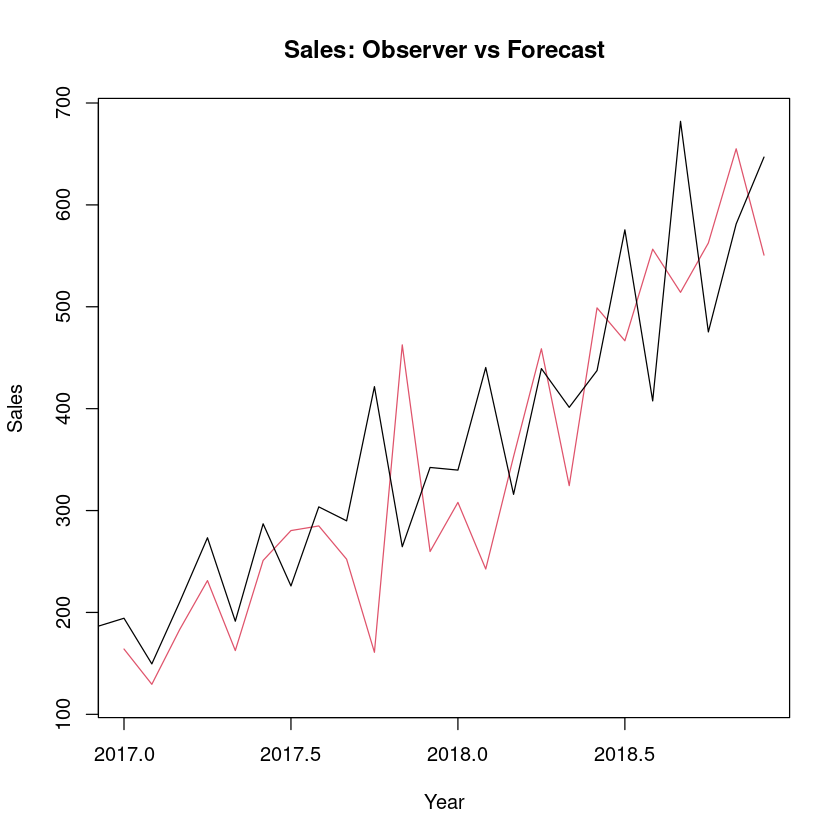

In [18]:
plot(data_forecast, main = "Sales: Observer vs Forecast",
     xlab = 'Year', ylab = 'Sales')

In [19]:
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [20]:
next_6_months = forecast:::forecast.HoltWinters(data_forecast, h = 6)

In [21]:
next_6_months

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2019       581.9057 510.2721 653.5393 472.3516 691.4598
Feb 2019       609.9235 538.1703 681.6767 500.1865 719.6605
Mar 2019       569.1985 497.2523 641.1447 459.1662 679.2308
Apr 2019       752.1832 679.3874 824.9789 640.8517 863.5146
May 2019       601.4895 528.5795 674.3995 489.9832 712.9957
Jun 2019       752.5444 677.8091 827.2797 638.2466 866.8422

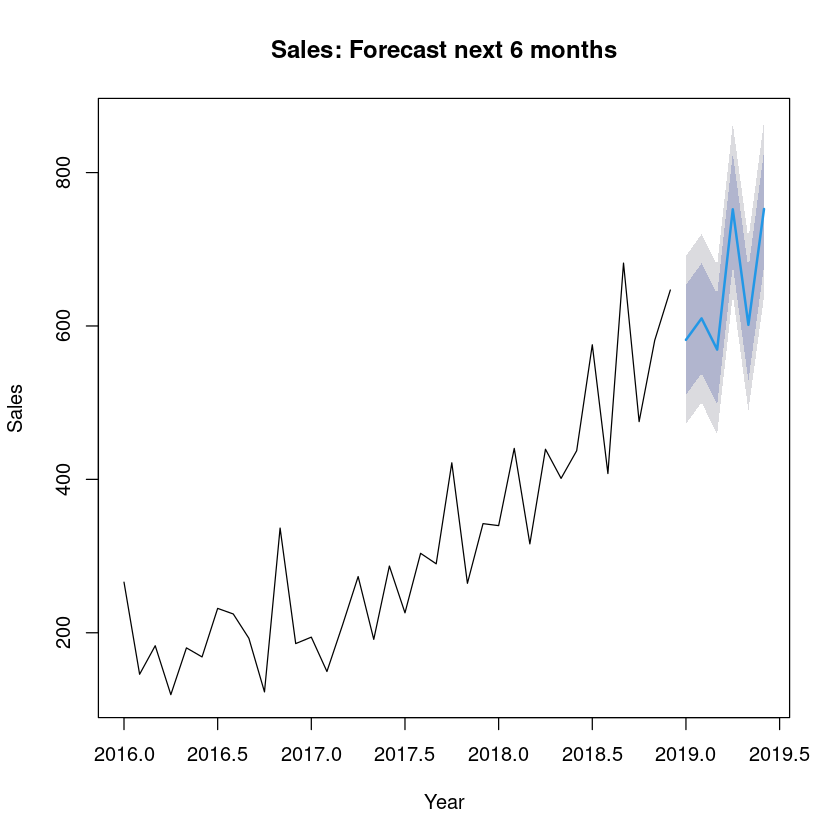

In [22]:
plot(next_6_months, main = 'Sales: Forecast next 6 months',
     xlab = 'Year', ylab = 'Sales')